---
title: "02-数据的初步观测"
author: "Simon Zhou"
date: "2025-05-02"
format: 
    html:
        code-fold: true
        fig_caption: true
        number-sections: true
        toc: true
        toc-depth: 2
---

# 主要观测命令

```{stata}
describe  // 描述数据集的基本信息
summarize  // 描述变量的基本信息
list  // 列出数据集的所有观测值
browse  // 浏览数据集的所有观测值
inspect  // 检查变量的分布情况
tabulate  // 生成频数表
histogram  // 生成直方图
scatter  // 生成散点图
```

# 获取数据与主要内置数据介绍

使用内置数据集可以用 `sysuse` 命令来加载数据集。Stata内置了多个数据集，常用的有 `auto`、`nlsw88`、`census` 等。

```{stata}
sysuse auto  // 美国1978年的汽车数据集
sysuse nlsw88  // 美国年轻妇女研究数据集
sysuse census  // 1980年的美国人口普查数据集
sysuse cancer  // 药物生存数据集
sysuse voter  // 1996年美国选民调查数据集
sysuse lifeexp  // 生命预期数据集
sysuse citytemp  // 城市气温数据集
sysuse gnp96  // 1967-2002年美国国民生产总值数据集
```

使用互联网上的数据集可以用 `webuse` 命令来加载数据集。

而 `webuse` 命令默认从 <http://www.stata-press.com/data> 这一路径获取数据。欲获取其他网络数据则只能使用 `use + <full web url>` 来获取。

当然也可以用 `use` 命令来加载本地数据集，但是需要给出数据集的完整路径。

## 以下数据集的基本信息

Stata内置的 1978 automobile data（数据集名为 auto）是一个经典的示例数据集，常用于演示统计分析、回归建模等操作。


In [2]:
import stata_setup
stata_setup.config('C:/Program Files/Stata18', 'mp', splash=False)

In [3]:
%%stata
sysuse auto, clear  
// 加载内置数据集


. sysuse auto, clear  
(1978 automobile data)

. // 加载内置数据集
. 


## describe 

展示变量类型、格式、和任何的赋值/变量标签

语法: `describe [varlist]`

注意: `[]` 意味着`[varlist]`是可选的，`varlist` 是变量列表，可以指定一个或多个变量。如果不指定，Stata将显示数据集中所有变量的信息。

In [4]:
%%stata
describe
// 描述数据集的变量信息


. describe

Contains data from C:\Program Files\Stata18/ado\base/a/auto.dta
 Observations:            74                  1978 automobile data
    Variables:            12                  13 Apr 2022 17:45
                                              (_dta has notes)
-------------------------------------------------------------------------------
Variable      Storage   Display    Value
    name         type    format    label      Variable label
-------------------------------------------------------------------------------
make            str18   %-18s                 Make and model
price           int     %8.0gc                Price
mpg             int     %8.0g                 Mileage (mpg)
rep78           int     %8.0g                 Repair record 1978
headroom        float   %6.1f                 Headroom (in.)
trunk           int     %8.0g                 Trunk space (cu. ft.)
weight          int     %8.0gc                Weight (lbs.)
length          int     %8.0g           

In [5]:
%%stata
// 简要描述数据集的变量信息
describe ,short


. // 简要描述数据集的变量信息
. describe ,short

Contains data from C:\Program Files\Stata18/ado\base/a/auto.dta
 Observations:            74                  1978 automobile data
    Variables:            12                  13 Apr 2022 17:45
Sorted by: foreign

. 


## count

计算数据集中观测值的数量

语法: `count [if] [in]`

In [6]:
%%stata
// 计算数据集中的观测值数量
count
// 计算数据集中观测值价格大于4000的数量
count if price > 4000


. // 计算数据集中的观测值数量
. count
  74

. // 计算数据集中观测值价格大于4000的数量
. count if price > 4000
  63

. 


## isid 

检查数据集中是否有重复的观测值（是否唯一标识符）

语法: `isid varlist`

如果报错就说明不是，如果没有报错就说明是唯一标识符。

In [7]:
%%stata
// 检查变量mpg是否是唯一标识符
isid mpg

SystemError: 
. // 检查变量mpg是否是唯一标识符
. isid mpg
variable mpg does not uniquely identify the observations
r(459);
r(459);


In [ ]:
%%stata
// 检查变量price是否是唯一标识符
isid price
// 检查变量mpg和price的组合是否是唯一标识符
isid mpg price


. isid price

. // 检查变量price是否是唯一标识符
. isid mpg price

. // 检查变量mpg和price的组合是否是唯一标识符
. 


## unique

`unique` 是一个用户自定义命令，用于检查数据集中变量的唯一值，它不是自带的，需要用户进行安装。

语法: `unique varlist`

它和 `isid` 的区别在于，`isid` 只检查唯一标识符，而 `unique` 可以检查任意变量的唯一值。

`isid` 在遇到重复值时会报错，而 `unique` 会返回一个包含唯一值的列表。

In [ ]:
%%stata
ssc install unique

checking unique consistency and verifying not already installed...
installing into C:\Users\asus\ado\plus\...
installation complete.


In [ ]:
%%stata
unique mpg
unique weight
unique price
unique mpg weight


. unique mpg
Number of unique values of mpg is  21
Number of records is  74

. unique weight
Number of unique values of weight is  64
Number of records is  74

. unique price
Number of unique values of price is  74
Number of records is  74

. unique mpg weight
Number of unique values of mpg weight is  74
Number of records is  74

. 


## summarize
展示变量的基本统计信息，包括均值、标准差、最小值、最大值等。

语法: `summarize [varlist]`

In [9]:
%%stata
// 只查看 `auto` 数据集中的 `price` 变量
summarize price
// 查看 `auto` 数据集中所有的变量信息
summarize


. // 只查看 `auto` 数据集中的 `price` 变量
. summarize price

    Variable |        Obs        Mean    Std. dev.       Min        Max
-------------+---------------------------------------------------------
       price |         74    6165.257    2949.496       3291      15906

. // 查看 `auto` 数据集中所有的变量信息
. summarize

    Variable |        Obs        Mean    Std. dev.       Min        Max
-------------+---------------------------------------------------------
        make |          0
       price |         74    6165.257    2949.496       3291      15906
         mpg |         74     21.2973    5.785503         12         41
       rep78 |         69    3.405797    .9899323          1          5
    headroom |         74    2.993243    .8459948        1.5          5
-------------+---------------------------------------------------------
       trunk |         74    13.75676    4.277404          5         23
      weight |         74    3019.459    777.1936       1760       4840
      length |  

## list
列出数据集的所有观测值

语法: `list [varlist] [if] [in]`

如果不指定 `varlist`，Stata 将列出数据集中的所有变量。
如果不指定 `if` 和 `in`，Stata 将列出数据集中的所有观测值。

如果指定了 `if` 和 `in`，Stata 将只列出满足条件的观测值。

In [ ]:
%%stata
// 只查看 `auto` 数据集中的 `price` 变量，显示详细信息
summarize price, detail

// 查看 `auto` 数据集中所有的变量信息，限制显示前10行
list in 1/10


. // 只查看 `auto` 数据集中的 `price` 变量，显示详细信息
. summarize price, detail

                            Price
-------------------------------------------------------------
      Percentiles      Smallest
 1%         3291           3291
 5%         3748           3299
10%         3895           3667       Obs                  74
25%         4195           3748       Sum of wgt.          74

50%       5006.5                      Mean           6165.257
                        Largest       Std. dev.      2949.496
75%         6342          13466
90%        11385          13594       Variance        8699526
95%        13466          14500       Skewness       1.653434
99%        15906          15906       Kurtosis       4.819188

. 
. // 查看 `auto` 数据集中所有的变量信息，限制显示前10行
. list in 10

     +-----------------------------------------------------------------+
 10. | make          | price | mpg | rep78 | headroom | trunk | weight |
     | Buick Skylark | 4,082 |  19 |     3 |      3.5 |    13 |  3,400 |


## tabulate
用于生成频数表

语法: `tabulate varlist [if] [in]`

命令可以简写为 `tab`。

如果不指定 `if` 和 `in`，Stata 将列出数据集中的所有观测值。
如果指定了 `if` 和 `in`，Stata 将只列出满足条件的观测值。

In [26]:
%%stata
// 对 `auto` 数据集生成频数表
tabulate foreign

// 对 `auto` 数据集生成二维交叉表
tab foreign rep78


. // 对 `auto` 数据集生成频数表
. tabulate foreign

 Car origin |      Freq.     Percent        Cum.
------------+-----------------------------------
   Domestic |         52       70.27       70.27
    Foreign |         22       29.73      100.00
------------+-----------------------------------
      Total |         74      100.00

. 
. // 对 `auto` 数据集生成二维交叉表
. tab foreign rep78

           |                   Repair record 1978
Car origin |         1          2          3          4          5 |     Total
-----------+-------------------------------------------------------+----------
  Domestic |         2          8         27          9          2 |        48 
   Foreign |         0          0          3          9          9 |        21 
-----------+-------------------------------------------------------+----------
     Total |         2          8         30         18         11 |        69 

. 


In [27]:
%%stata
// 将缺失值定位某一类别, missing 可以简写为 m
tab foreign, m

// 不显示频率结果, nofreq 可以简写为 nof
tab foreign, nofreq

// 不显示标签值, nolabel 可以简写为 nol
tab foreign, nolabel


. // 将缺失值定位某一类别, missing 可以简写为 m
. tab foreign, m

 Car origin |      Freq.     Percent        Cum.
------------+-----------------------------------
   Domestic |         52       70.27       70.27
    Foreign |         22       29.73      100.00
------------+-----------------------------------
      Total |         74      100.00

. 
. // 不显示频率结果, nofreq 可以简写为 nof
. tab foreign, nofreq

. 
. // 不显示标签值, nolabel 可以简写为 nol
. tab foreign, nolabel

 Car origin |      Freq.     Percent        Cum.
------------+-----------------------------------
          0 |         52       70.27       70.27
          1 |         22       29.73      100.00
------------+-----------------------------------
      Total |         74      100.00

. 


In [28]:
%%stata
// 生成相对频率的条形图
tab foreign, p

// 按照频率数对 `auto` 数据集进行排序
tabulate foreign, sort


. // 生成相对频率的条形图
. tab foreign, p

 Car origin |      Freq.
------------+------------+-----------------------------------------------------
   Domestic |         52 |****************************************************
    Foreign |         22 |**********************
------------+------------+-----------------------------------------------------
      Total |         74 

. 
. // 按照频率数对 `auto` 数据集进行排序
. tabulate foreign, sort

 Car origin |      Freq.     Percent        Cum.
------------+-----------------------------------
   Domestic |         52       70.27       70.27
    Foreign |         22       29.73      100.00
------------+-----------------------------------
      Total |         74      100.00

. 


## histogram
生成直方图，用于展示变量的分布情况

语法: `histogram varname [if] [in]`

如果不指定 `if` 和 `in`，Stata 将列出数据集中的所有观测值。


. // 生成 `price` 变量的直方图，并叠加正态分布曲线
. histogram price, normal


(bin=8, start=3291, width=1576.875)

. 


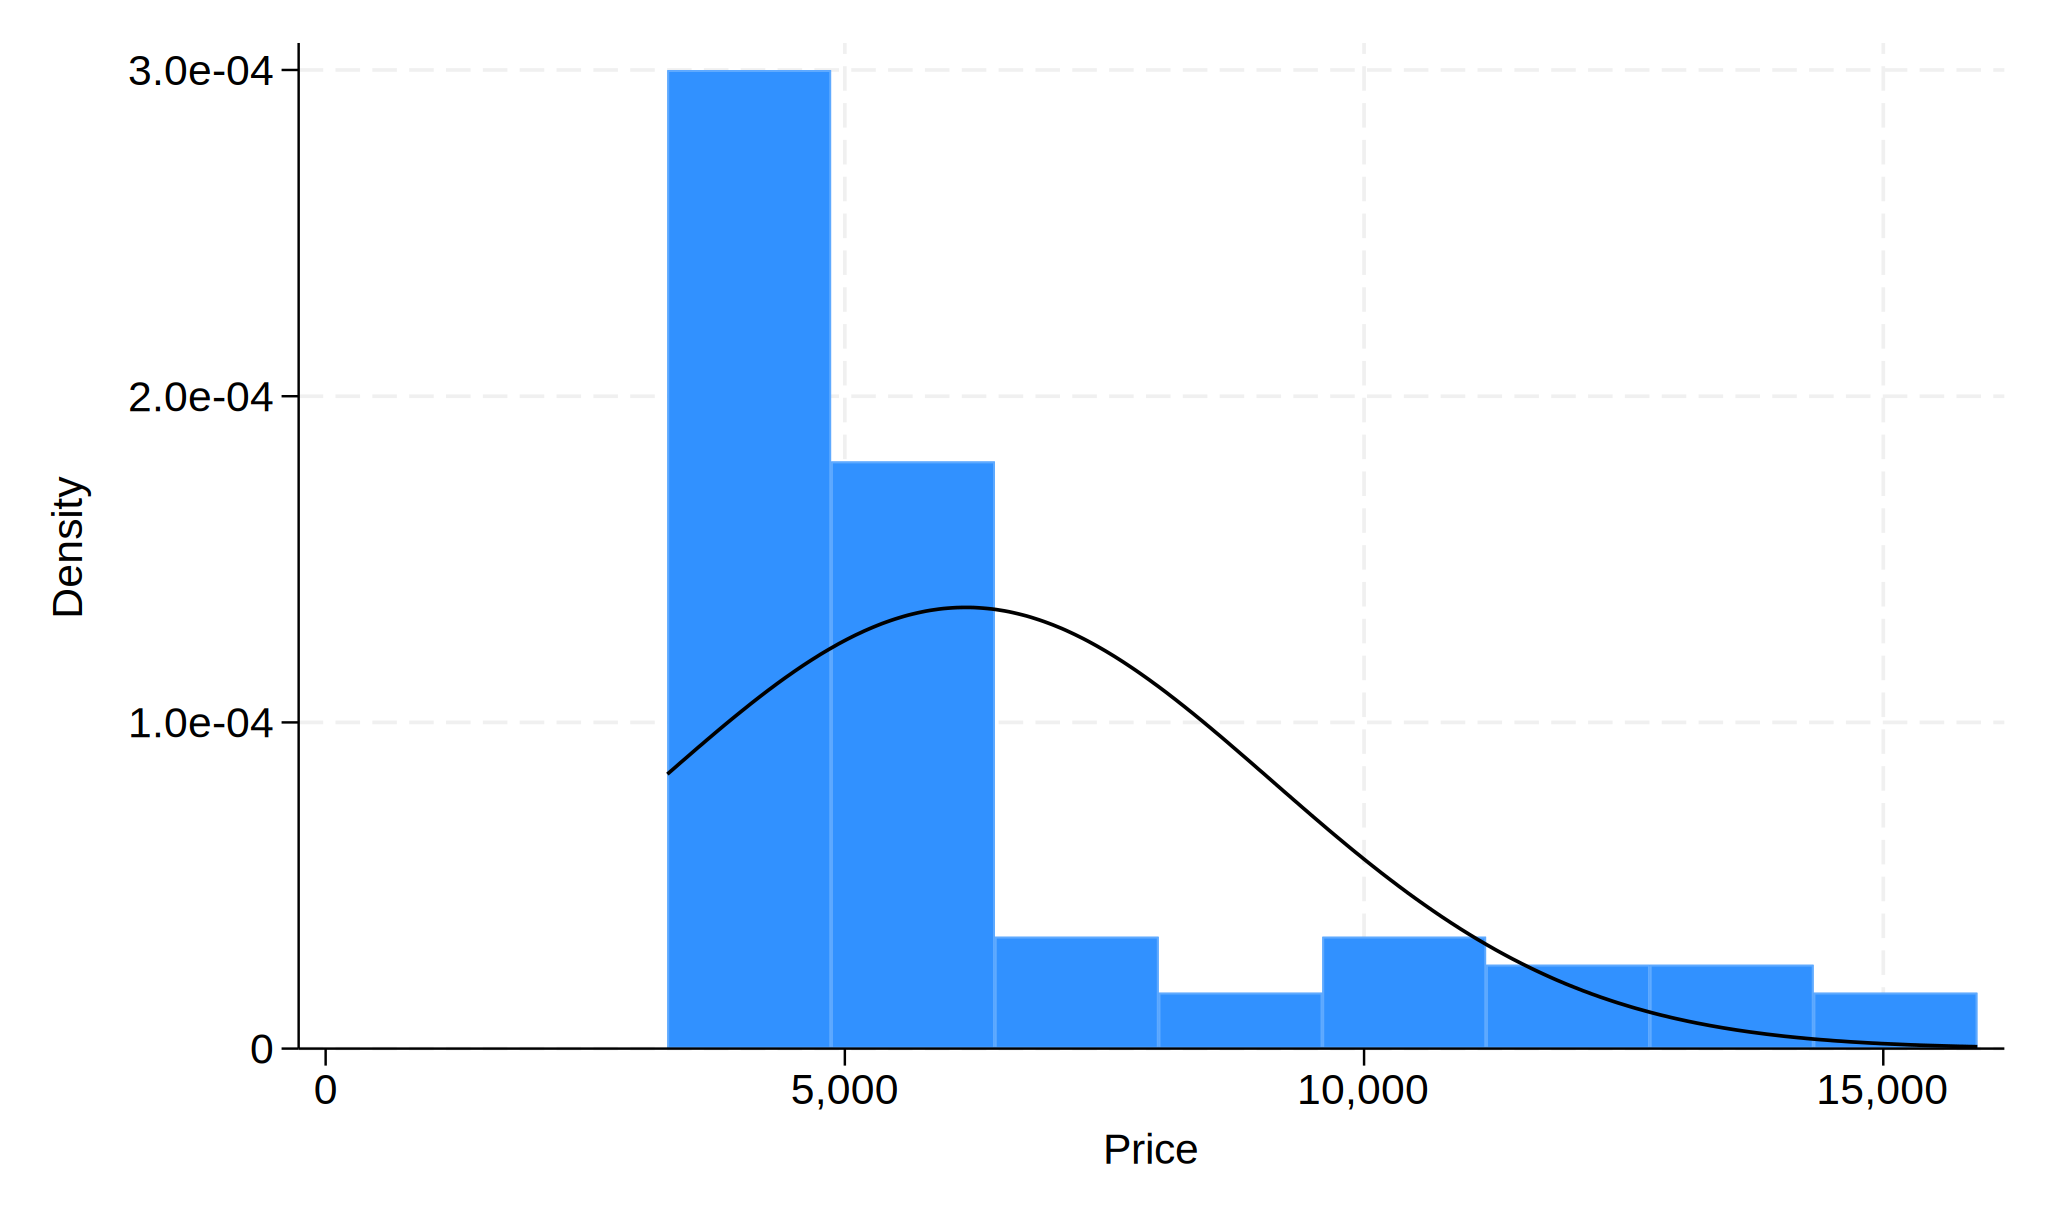

In [31]:
%%stata
// 生成 `price` 变量的直方图，并叠加正态分布曲线
histogram price, normal


. // 生成 `price` 变量的直方图，并叠加频率分布曲线
. histogram price, normal frequency
(bin=8, start=3291, width=1576.875)

. 


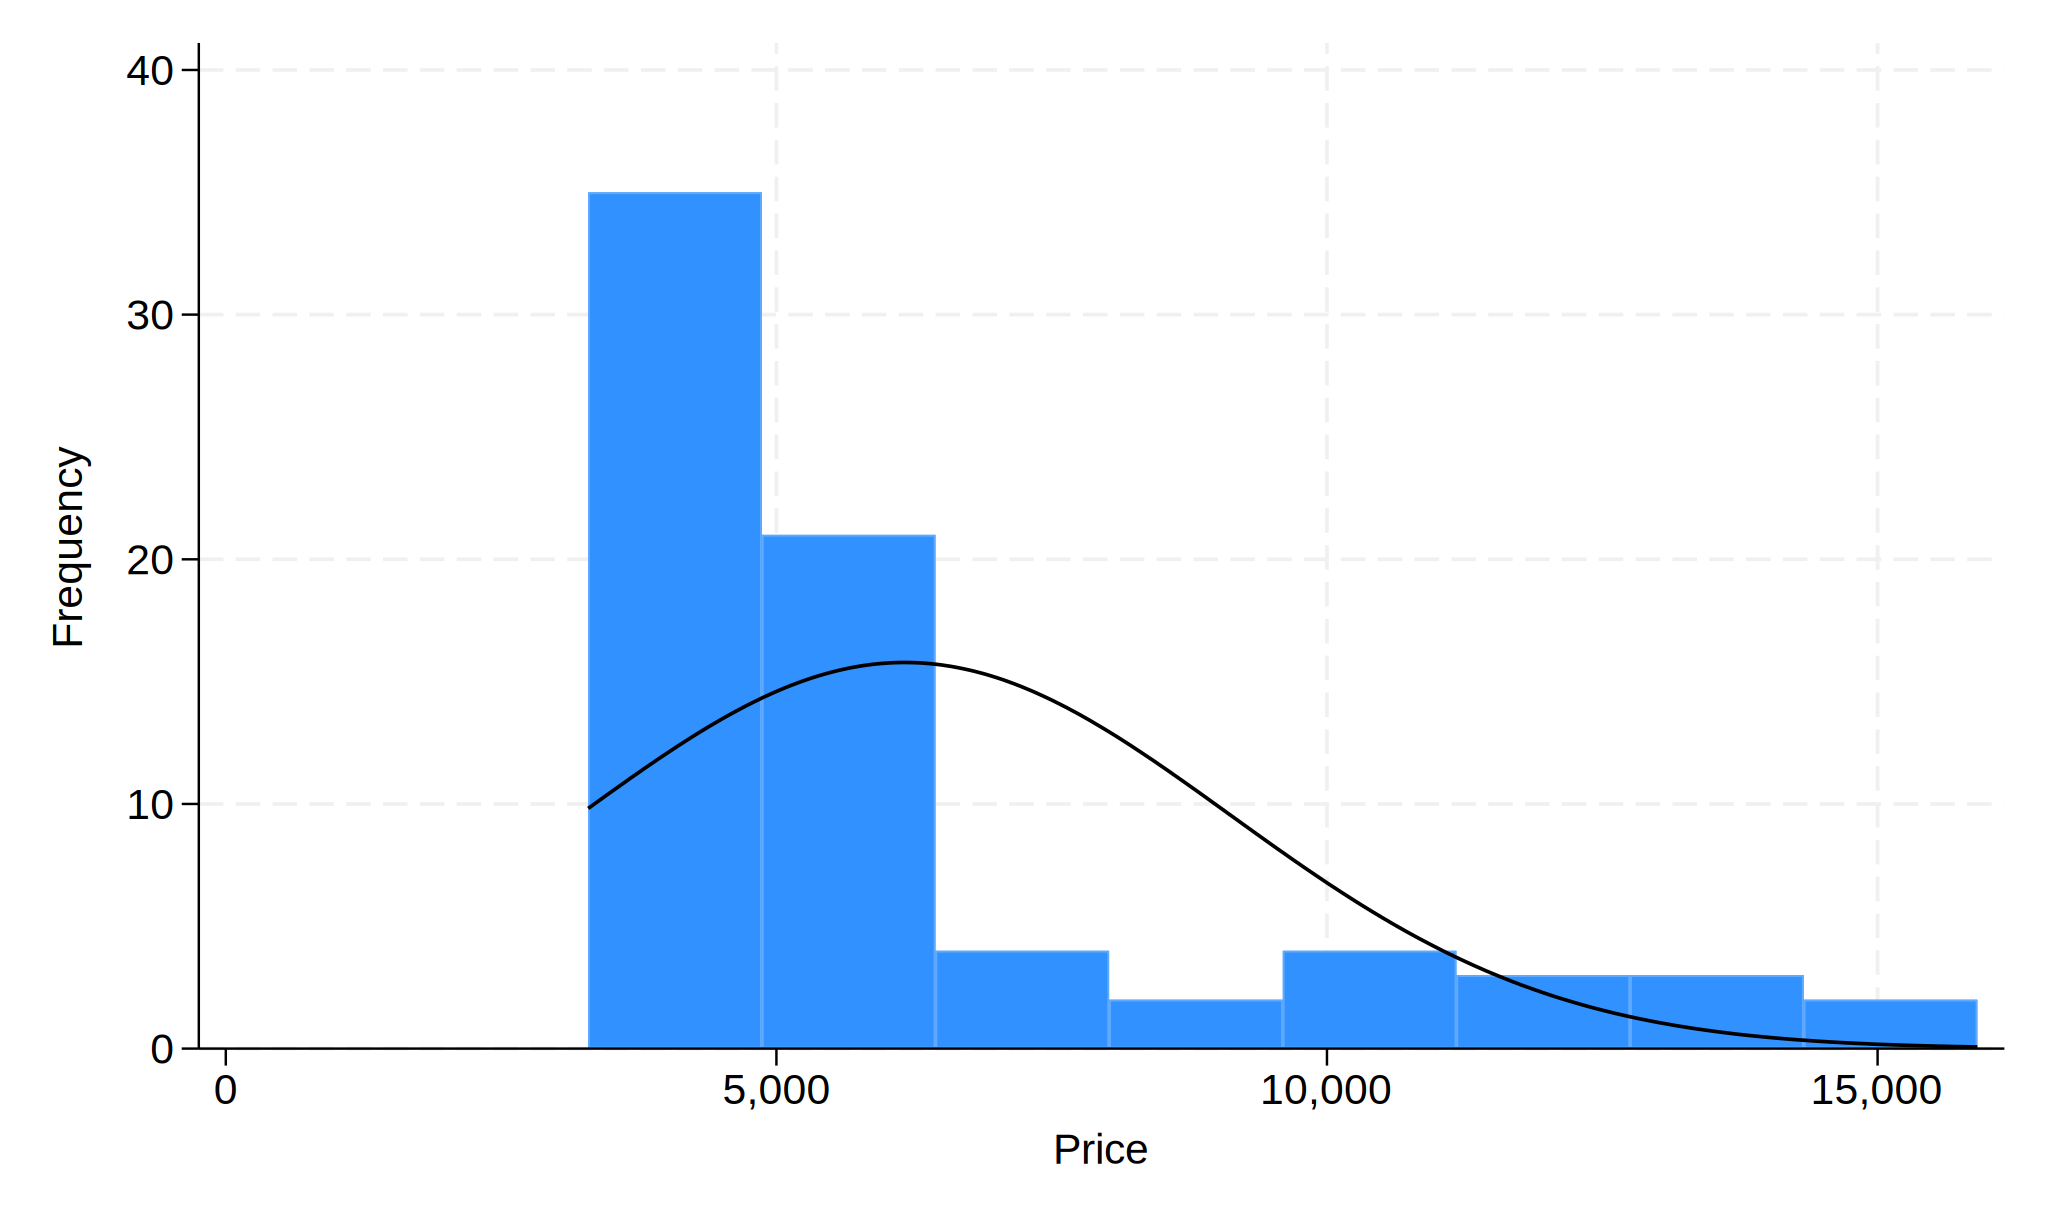

In [32]:
%%stata
// 生成 `price` 变量的直方图，并叠加频率分布曲线
histogram price, normal frequency


. // 生成 `price` 变量的直方图，并叠加频率分布曲线，设置标题和坐标轴标签
. histogram price, normal frequency ytitle("Frequency") xtitle("Price") title("
> Histogram of Price")
(bin=8, start=3291, width=1576.875)

. 


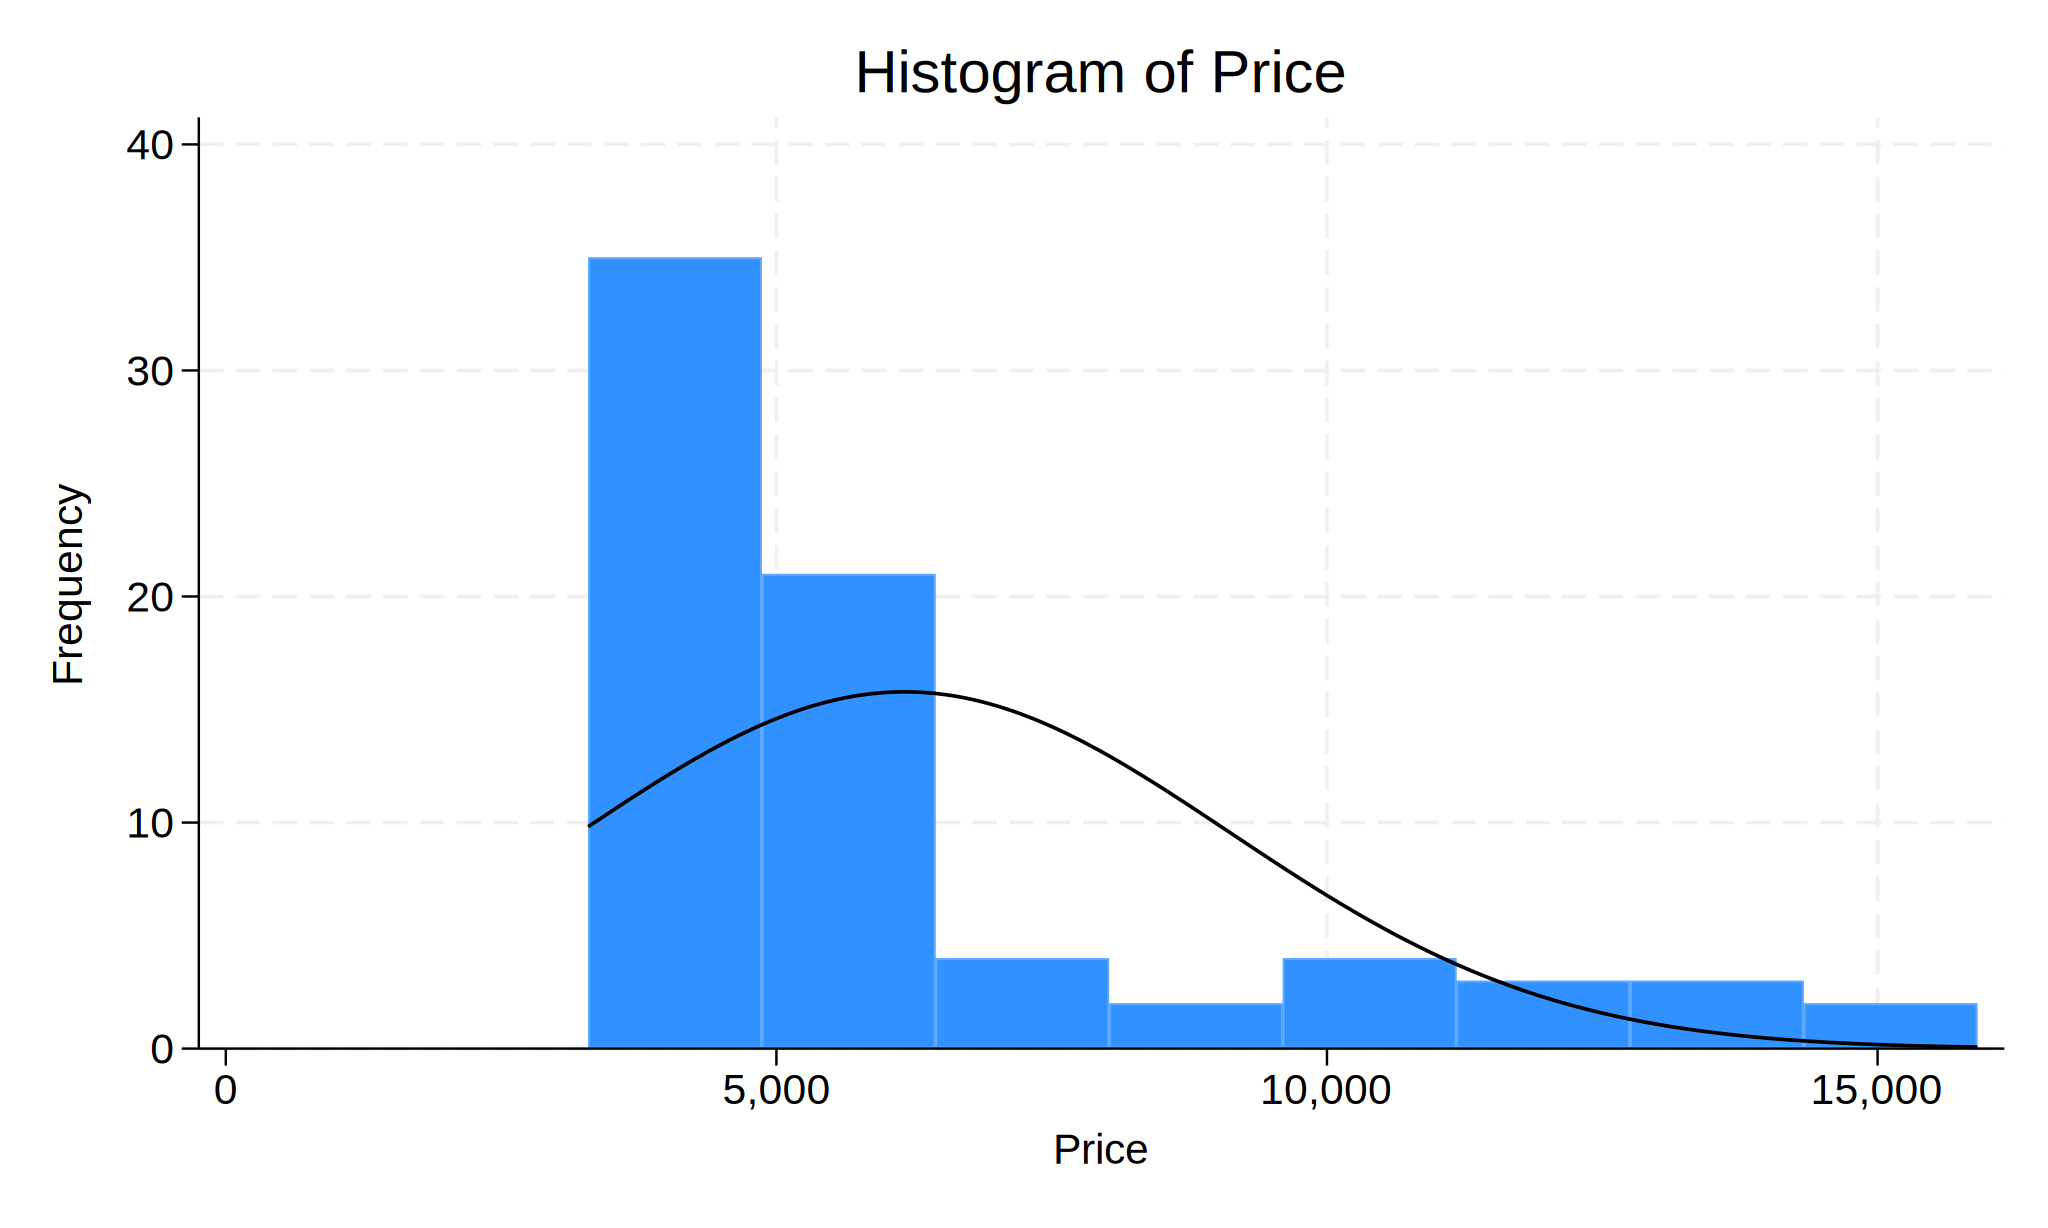

In [33]:
%%stata
// 生成 `price` 变量的直方图，并叠加频率分布曲线，设置标题和坐标轴标签
histogram price, normal frequency ytitle("Frequency") xtitle("Price") title("Histogram of Price")

## scatter
生成散点图，用于展示两个变量之间的关系

语法: `scatter yvar xvar [if] [in]`


. // 生成 `mpg` 和 `weight` 变量的散点图
. scatter mpg weight

. 


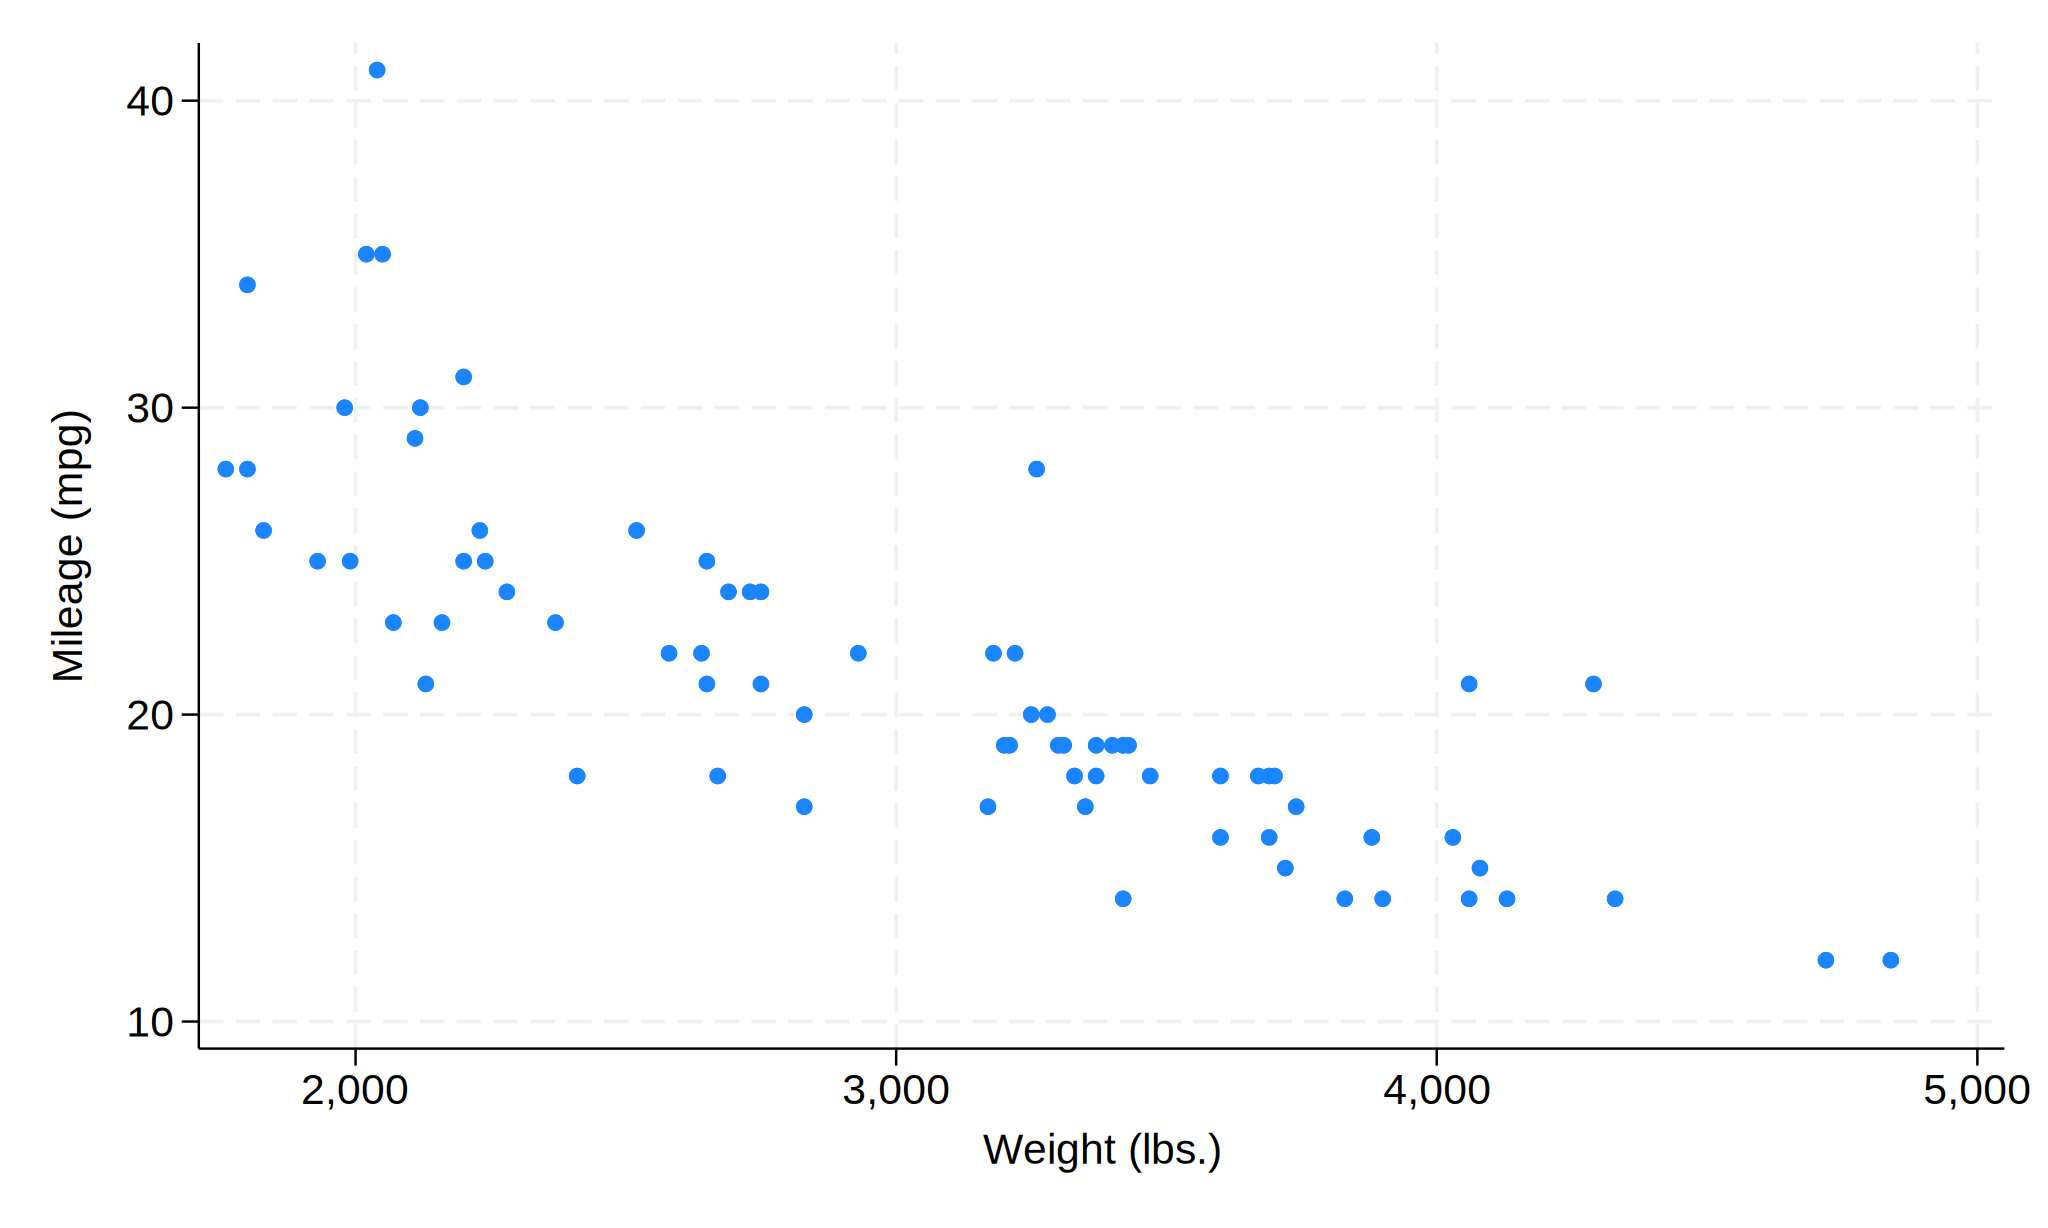

In [34]:
%%stata
// 生成 `mpg` 和 `weight` 变量的散点图
scatter mpg weight
